In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, mean_squared_error, auc, roc_curve
pd.set_option("display.max_rows", None, "display.max_columns", None)
import math

from scipy.stats import pointbiserialr
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency


In [43]:
train_data_raw = pd.read_csv("AI Challenge Data/AI 2/ClientScore (Training Data).csv")
test_data_raw = pd.read_csv("AI Challenge Data/AI 2/ClientScore (Testing Data).csv")
new_col_names = ['score1', 'score2','CreditWorthy']
train_data_raw.columns = new_col_names
test_data_raw.columns = new_col_names

In [15]:
train_data_raw.describe()

,score1,score2,CreditWorthy
count,200.000000,200.000000,200.000000
mean,50.545000,48.470000,0.380000
std,28.092954,28.858851,0.486604
min,1.000000,1.000000,0.000000
25%,27.000000,22.750000,0.000000
50%,53.000000,50.500000,0.000000
75%,75.000000,73.000000,1.000000
max,100.000000,100.000000,1.000000


In [120]:
train_data_raw['CreditWorthy'].value_counts()

0    124
1     76
Name: CreditWorthy, dtype: int64

In [109]:
n=max(train_data_raw['CreditWorthy'].value_counts())

In [119]:
train_data[train_data['CreditWorthy']==1]

,score1,score2,CreditWorthy
0,29,93,1
1,75,52,1
2,58,74,1
4,42,91,1
6,66,69,1
7,76,82,1
11,67,57,1
13,51,68,1
15,90,21,1
18,27,84,1


In [121]:
train_data_over = train_data[train_data['CreditWorthy']==1].sample(n, replace=True)
train_data_over.shape

(124, 3)

In [125]:
train_data=pd.concat([train_data_over, train_data[train_data['CreditWorthy']==0]])
train_data

,score1,score2,CreditWorthy
127,83,27,1
87,94,82,1
51,95,78,1
24,86,51,1
112,96,53,1
48,69,86,1
155,64,49,1
27,55,89,1
40,83,74,1
173,74,30,1


In [126]:
train_data['CreditWorthy'].value_counts()

1    124
0    124
Name: CreditWorthy, dtype: int64

In [44]:
test_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   score1        50 non-null     int64
 1   score2        50 non-null     int64
 2   CreditWorthy  50 non-null     int64
dtypes: int64(3)
memory usage: 1.3 KB


In [127]:
#train_data = train_data_raw.copy(deep = True)

In [128]:
clf = LogisticRegression(penalty='none')
clf.fit(train_data.drop(['CreditWorthy'],axis=1), train_data['CreditWorthy'])
y_pred = clf.predict(test_data_raw.drop(['CreditWorthy'],axis=1))

In [129]:

cm = pd.DataFrame(confusion_matrix(y_pred, test_data_raw['CreditWorthy'])) # confusion matrix to see positive truevalue
cm.columns = ['True Y=0','True Y=1']
cm.index = ['Predicted Y=0','Predicted Y=1']
display(cm)

,True Y=0,True Y=1
Predicted Y=0,30,1
Predicted Y=1,2,17


In [130]:
accuracy_train = (cm['True Y=0']['Predicted Y=0']+cm['True Y=1']['Predicted Y=1'])/len(test_data_raw)
print(accuracy_train)
# high accuracy for training set

0.94


# Boundaries for of the classification

### Predicted classification

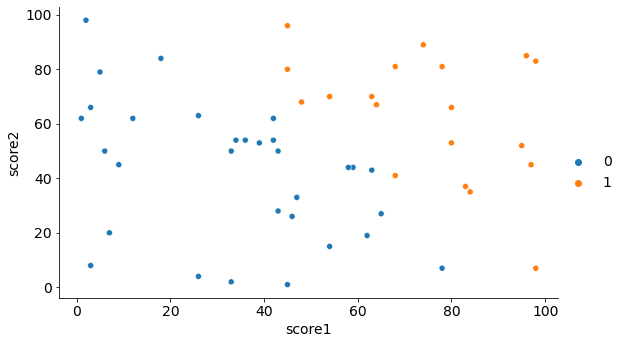

In [131]:
sns.relplot(data=test_data_raw, x=test_data_raw.score1, y=test_data_raw.score2, hue=y_pred, aspect=1.61)
plt.show()

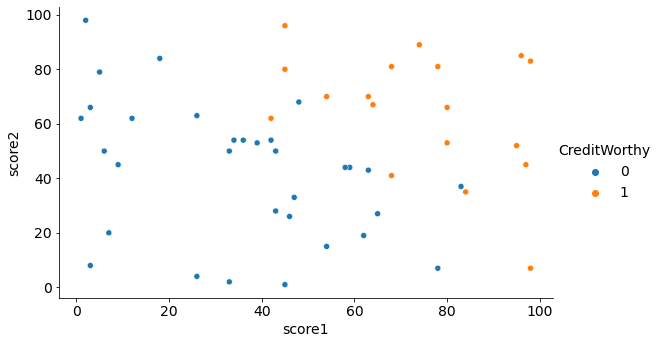

In [132]:
sns.relplot(data=test_data_raw, x=test_data_raw.score1, y=test_data_raw.score2, hue=test_data_raw.CreditWorthy, aspect=1.61)
plt.show()

### Matrix selected

Confusion matrix allow want to get a lot of info other than accuracy.
Can see the misclassifications, e.g. false positive

### Bias Variance TradeOff


If our model is too simple and has very few parameters then it may have high bias and low variance. 

high variance=>overfit
high bias => underfit